In [147]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
import sys
import os
import math

In [148]:
FlightsDB = pd.read_csv('../data/Flights_DB_clean.csv', sep = ',')
CustomerDB = pd.read_csv('../data/CustomerDB_clean.csv', sep = ',')

In [149]:
merged = FlightsDB.merge(CustomerDB, on='Loyalty#', how='left')

In [150]:
merged.shape

(614452, 31)

In [151]:
DB = merged[
    (
        # Case 1: No cancellation
        (merged['CancellationDate'].isna() & (merged['YearMonthDate'] >= merged['EnrollmentDateOpening']))
    )
    |
    (
        # Case 2: Cancellation after enrollment
        (merged['CancellationDate'].notna() & (merged['CancellationDate'] > merged['EnrollmentDateOpening']) &
         (merged['YearMonthDate'] >= merged['EnrollmentDateOpening']) &
         (merged['YearMonthDate'] < merged['CancellationDate']))
    )
    |
    (
        # Case 3: Cancellation before enrollment
        (merged['CancellationDate'] < merged['EnrollmentDateOpening']) &
        (merged['YearMonthDate'] >= merged['EnrollmentDateOpening']) &
        (merged['YearMonthDate'] < merged['CancellationDate'])
    )
]


Flight-Customer Merge Rules

**Customers without a cancellation date (CancellationDate is NaN):**

Keep all flights where YearMonthDate is greater than or equal to EnrollmentDateOpening.

**Customers with a cancellation date (CancellationDate exists) that is later than EnrollmentDateOpening:**

Keep all flights where YearMonthDate is between EnrollmentDateOpening (inclusive) and CancellationDate (exclusive).

**Cancellation before enrollment**

If the customer’s CancellationDate is earlier than the enrollment date, keep only the flights where the flight date is between the enrollment date and the cancellation date, inclusive.

In [152]:
DB.head()

,Unnamed: 0_x,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,413052,2021,12,2021-12-01,2,2,9384.0,938,0,...,Male,Bachelor,Urban,64429.0,Married,Star,2018-05-26,NaN,15923.96,Standard
1,1,464105,2021,12,2021-12-01,0,0,0.0,0,0,...,Female,Bachelor,Urban,84981.0,Married,Nova,2018-05-05,NaN,3878.77,Standard
2,2,681785,2021,12,2021-12-01,10,3,14745.0,1474,0,...,Male,Doctor,Urban,21986.0,Divorced,Star,2017-06-23,NaN,2395.57,Standard
3,3,185013,2021,12,2021-12-01,16,4,26311.0,2631,3213,...,Female,Bachelor,Rural,67780.0,Divorced,Nova,2018-02-26,NaN,7284.36,Standard
4,4,216596,2021,12,2021-12-01,9,0,19275.0,1927,0,...,Male,Bachelor,Suburban,74034.0,Divorced,Nova,2021-02-03,NaN,2862.18,2021 Promotion


In [153]:
DB = DB.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

In [154]:
DB.tail()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
614442,999631,2019,12,2019-12-01,3,1,12262.5,1226,0,0.0,...,Female,Bachelor,Urban,21104.0,Divorced,Star,2017-01-29,NaN,2572.51,Standard
614443,999731,2019,12,2019-12-01,0,0,0.0,0,0,0.0,...,Female,Bachelor,Urban,69600.0,Married,Star,2016-09-11,2020-12-30,2951.29,Standard
614446,999891,2019,12,2019-12-01,0,0,0.0,0,0,0.0,...,Female,Bachelor,Suburban,59732.0,Married,Nova,2019-05-22,2020-01-22,3745.37,Standard
614447,999902,2019,12,2019-12-01,7,0,30766.5,3076,0,0.0,...,Male,College,Urban,0.0,Married,Aurora,2017-05-24,NaN,7290.07,Standard
614448,999911,2019,12,2019-12-01,0,0,0.0,0,0,0.0,...,Male,Doctor,Suburban,23506.0,Single,Nova,2015-08-02,NaN,8564.77,Standard


In [155]:
DB.shape

(416454, 29)

In [156]:
DB.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,416454.0,NaN,NaN,NaN,549177.944796,257544.782605,100018.0,327320.0,550352.0,767534.0,999986.0
Year,416454.0,NaN,NaN,NaN,2020.12325,0.808167,2019.0,2019.0,2020.0,2021.0,2021.0
Month,416454.0,NaN,NaN,NaN,6.685497,3.441914,1.0,4.0,7.0,10.0,12.0
YearMonthDate,416454,36,2021-12-01,14660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumFlights,416454.0,NaN,NaN,NaN,5.127829,5.235937,0.0,0.0,4.0,9.0,21.0
NumFlightsWithCompanions,416454.0,NaN,NaN,NaN,1.257142,2.199867,0.0,0.0,0.0,2.0,11.0
DistanceKM,416454.0,NaN,NaN,NaN,10607.939754,10663.235692,0.0,0.0,8170.0,19108.0,42040.0
PointsAccumulated,416454.0,NaN,NaN,NaN,1060.481856,1066.176394,0.0,0.0,817.0,1910.0,4204.0
PointsRedeemed,416454.0,NaN,NaN,NaN,314.234725,1129.109401,0.0,0.0,0.0,0.0,7496.0
DollarCostPointsRedeemed,416454.0,NaN,NaN,NaN,3.105517,11.168726,0.0,0.0,0.0,0.0,74.0


In [157]:
DB.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                    int64
NumFlightsWithCompanions      int64
DistanceKM                  float64
PointsAccumulated             int64
PointsRedeemed                int64
DollarCostPointsRedeemed    float64
First Name                   object
Last Name                    object
Customer Name                object
Country                      object
Province or State            object
City                         object
Latitude                    float64
Longitude                   float64
Postal code                  object
Gender                       object
Education                    object
Location Code                object
Income                      float64
Marital Status               object
LoyaltyStatus                object
EnrollmentDateOpening        object
CancellationDate             object
Customer Lifetime Value     

In [158]:
import pandas as pd

# --- Convert date columns ---
DB['EnrollmentDateOpening'] = pd.to_datetime(DB['EnrollmentDateOpening'], errors='coerce')
DB['CancellationDate'] = pd.to_datetime(DB['CancellationDate'], errors='coerce')
DB['YearMonthDate'] = pd.to_datetime(DB['YearMonthDate'], errors='coerce')

int_cols = ['Year', 'Month',
            'NumFlights', 'NumFlightsWithCompanions',
            'PointsAccumulated', 'PointsRedeemed']

for col in int_cols:
    DB[col] = pd.to_numeric(DB[col], errors='coerce').astype('Int64')



# --- Optional sanity check ---
print(DB.dtypes)


Loyalty#                             int64
Year                                 Int64
Month                                Int64
YearMonthDate               datetime64[ns]
NumFlights                           Int64
NumFlightsWithCompanions             Int64
DistanceKM                         float64
PointsAccumulated                    Int64
PointsRedeemed                       Int64
DollarCostPointsRedeemed           float64
First Name                          object
Last Name                           object
Customer Name                       object
Country                             object
Province or State                   object
City                                object
Latitude                           float64
Longitude                          float64
Postal code                         object
Gender                              object
Education                           object
Location Code                       object
Income                             float64
Marital Sta

In [159]:
DB.nunique()

Loyalty#                    15819
Year                            3
Month                          12
YearMonthDate                  36
NumFlights                     22
NumFlightsWithCompanions       12
DistanceKM                  64316
PointsAccumulated            4143
PointsRedeemed               4757
DollarCostPointsRedeemed      104
First Name                   4903
Last Name                   14597
Customer Name               15966
Country                         1
Province or State              11
City                           29
Latitude                       29
Longitude                      29
Postal code                    55
Gender                          2
Education                       5
Location Code                   3
Income                       5635
Marital Status                  3
LoyaltyStatus                   3
EnrollmentDateOpening        2418
CancellationDate              829
Customer Lifetime Value      7912
EnrollmentType                  2
dtype: int64

In [160]:
DB.nunique()==1

Loyalty#                    False
Year                        False
Month                       False
YearMonthDate               False
NumFlights                  False
NumFlightsWithCompanions    False
DistanceKM                  False
PointsAccumulated           False
PointsRedeemed              False
DollarCostPointsRedeemed    False
First Name                  False
Last Name                   False
Customer Name               False
Country                      True
Province or State           False
City                        False
Latitude                    False
Longitude                   False
Postal code                 False
Gender                      False
Education                   False
Location Code               False
Income                      False
Marital Status              False
LoyaltyStatus               False
EnrollmentDateOpening       False
CancellationDate            False
Customer Lifetime Value     False
EnrollmentType              False
dtype: bool

In [161]:
DB = DB.drop(columns=['Country'])
#1 unique value

In [162]:
DB.columns

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed', 'First Name', 'Last Name',
       'Customer Name', 'Province or State', 'City', 'Latitude', 'Longitude',
       'Postal code', 'Gender', 'Education', 'Location Code', 'Income',
       'Marital Status', 'LoyaltyStatus', 'EnrollmentDateOpening',
       'CancellationDate', 'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')

In [163]:
DB.isna().sum()

Loyalty#                         0
Year                             0
Month                            0
YearMonthDate                    0
NumFlights                       0
NumFlightsWithCompanions         0
DistanceKM                       0
PointsAccumulated                0
PointsRedeemed                   0
DollarCostPointsRedeemed         0
First Name                       0
Last Name                        0
Customer Name                    0
Province or State                0
City                             0
Latitude                         0
Longitude                        0
Postal code                      0
Gender                           0
Education                        0
Location Code                    0
Income                           0
Marital Status                   0
LoyaltyStatus                    0
EnrollmentDateOpening            0
CancellationDate            397457
Customer Lifetime Value          0
EnrollmentType                   0
dtype: int64

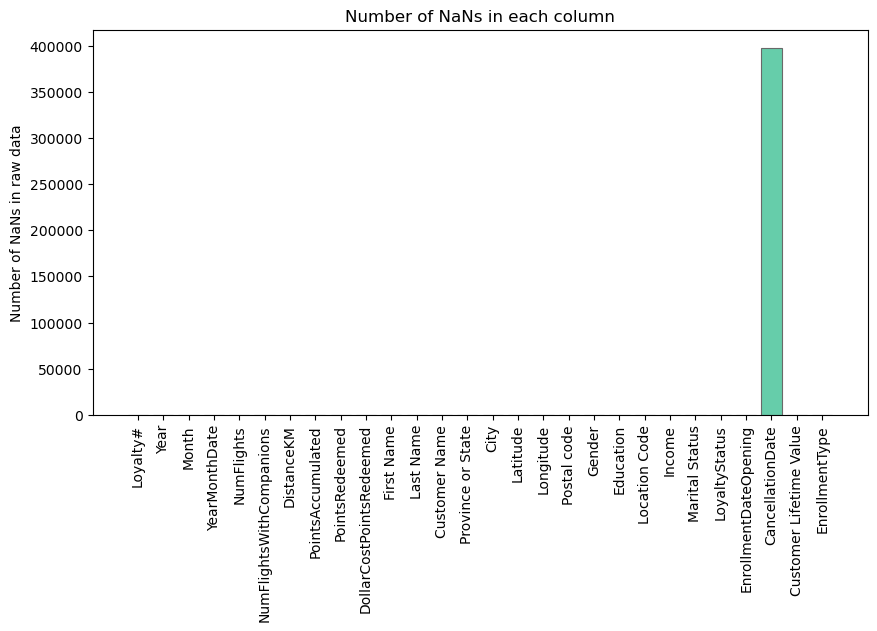

In [164]:
number_of_nans = DB.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs in raw data')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

In [165]:
primary_key = ['Loyalty#', 'Customer Name']
unique_count = DB[primary_key].drop_duplicates().shape[0]
n_rows = DB.shape[0]

if unique_count != n_rows:
    print('Oh no! There are repetitions!')
else:
    print('All good! No repetitions!')


Oh no! There are repetitions!


In [166]:
# Group by Loyalty# and see if there are multiple unique customer names
loyalty_name_counts = DB.groupby('Loyalty#')['Customer Name'].nunique()

# Filter Loyalty# with more than one unique customer name
duplicate_ids_different_names = loyalty_name_counts[loyalty_name_counts > 1].index

# Select rows with these Loyalty# values
duplicated_loyalty_diff_name = DB[DB['Loyalty#'].isin(duplicate_ids_different_names)]

# Sort by Loyalty# and EnrollmentDateOpening
duplicated_loyalty_sorted = duplicated_loyalty_diff_name.sort_values(by=['Loyalty#', 'EnrollmentDateOpening'])

# Show the result
duplicated_loyalty_sorted[['Loyalty#', 'Customer Name', 'EnrollmentDateOpening']]


,Loyalty#,Customer Name,EnrollmentDateOpening
2909,101902,Hans Schlottmann,2020-01-07
5744,101902,Hans Schlottmann,2020-01-07
13957,101902,Hans Schlottmann,2020-01-07
28361,101902,Hans Schlottmann,2020-01-07
37557,101902,Hans Schlottmann,2020-01-07
...,...,...,...
580173,992168,Crysta Bennin,2017-12-18
597240,992168,Crysta Bennin,2017-12-18
597242,992168,Crysta Bennin,2017-12-18
614313,992168,Crysta Bennin,2017-12-18


In [167]:
# Select all duplicate rows
duplicates_df = DB[DB.duplicated(keep=False)]

# Optional: sort by Loyalty# or any other column
duplicates_df = duplicates_df.sort_values(by='Loyalty#')

# Display the duplicates
duplicates_df


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType


In [168]:
# Remove fully duplicate rows, keeping the first occurrence
DB_clean = DB.drop_duplicates(keep='first')

# Optional: reset the index
DB_clean = DB_clean.reset_index(drop=True)

# Display the cleaned DataFrame
DB_clean

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,413052,2021,12,2021-12-01,2,2,9384.0,938,0,0.0,...,Male,Bachelor,Urban,64429.0,Married,Star,2018-05-26,NaT,15923.96,Standard
1,464105,2021,12,2021-12-01,0,0,0.0,0,0,0.0,...,Female,Bachelor,Urban,84981.0,Married,Nova,2018-05-05,NaT,3878.77,Standard
2,681785,2021,12,2021-12-01,10,3,14745.0,1474,0,0.0,...,Male,Doctor,Urban,21986.0,Divorced,Star,2017-06-23,NaT,2395.57,Standard
3,185013,2021,12,2021-12-01,16,4,26311.0,2631,3213,32.0,...,Female,Bachelor,Rural,67780.0,Divorced,Nova,2018-02-26,NaT,7284.36,Standard
4,216596,2021,12,2021-12-01,9,0,19275.0,1927,0,0.0,...,Male,Bachelor,Suburban,74034.0,Divorced,Nova,2021-02-03,NaT,2862.18,2021 Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416449,999631,2019,12,2019-12-01,3,1,12262.5,1226,0,0.0,...,Female,Bachelor,Urban,21104.0,Divorced,Star,2017-01-29,NaT,2572.51,Standard
416450,999731,2019,12,2019-12-01,0,0,0.0,0,0,0.0,...,Female,Bachelor,Urban,69600.0,Married,Star,2016-09-11,2020-12-30,2951.29,Standard
416451,999891,2019,12,2019-12-01,0,0,0.0,0,0,0.0,...,Female,Bachelor,Suburban,59732.0,Married,Nova,2019-05-22,2020-01-22,3745.37,Standard
416452,999902,2019,12,2019-12-01,7,0,30766.5,3076,0,0.0,...,Male,College,Urban,0.0,Married,Aurora,2017-05-24,NaT,7290.07,Standard


In [169]:
# Group by Loyalty# and EnrollmentDateOpening
points_summary = DB_clean.groupby(['Loyalty#','EnrollmentDateOpening']).agg(
    total_points_accumulated=('PointsAccumulated','sum'),
    total_points_redeemed=('PointsRedeemed','sum')
).reset_index()

# Check if accumulated >= redeemed
points_summary['points_ok'] = points_summary['total_points_accumulated'] >= points_summary['total_points_redeemed']

# Display the summary
points_summary


,Loyalty#,EnrollmentDateOpening,total_points_accumulated,total_points_redeemed,points_ok
0,100018,2019-08-09,40467,12236,True
1,100102,2016-03-09,33900,18759,True
2,100140,2019-07-30,33010,4896,True
3,100214,2018-08-06,36451,12907,True
4,100272,2017-01-09,42949,10891,True
...,...,...,...,...,...
15961,999902,2017-05-24,61002,10501,True
15962,999911,2015-08-02,0,0,True
15963,999940,2020-07-25,17164,5620,True
15964,999982,2021-07-06,5264,0,True


In [170]:
# Rows where accumulated points < redeemed points
points_issues = points_summary[points_summary['points_ok'] == False]

# Display them
points_issues


,Loyalty#,EnrollmentDateOpening,total_points_accumulated,total_points_redeemed,points_ok
78,103975,2021-08-21,5457,9014,False
114,106444,2020-12-20,12108,12947,False
164,108857,2020-08-20,5624,7948,False
168,109023,2018-07-22,21902,25590,False
286,116238,2021-07-14,6771,6798,False
...,...,...,...,...,...
15775,989067,2021-06-17,7535,8061,False
15784,989527,2021-02-03,7431,10999,False
15824,991627,2021-01-12,4660,8599,False
15932,997964,2020-04-25,17121,17750,False


## Features

In [171]:
numeric_cols = DB_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols = DB_clean.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

## Categorical Columns

### Histograms

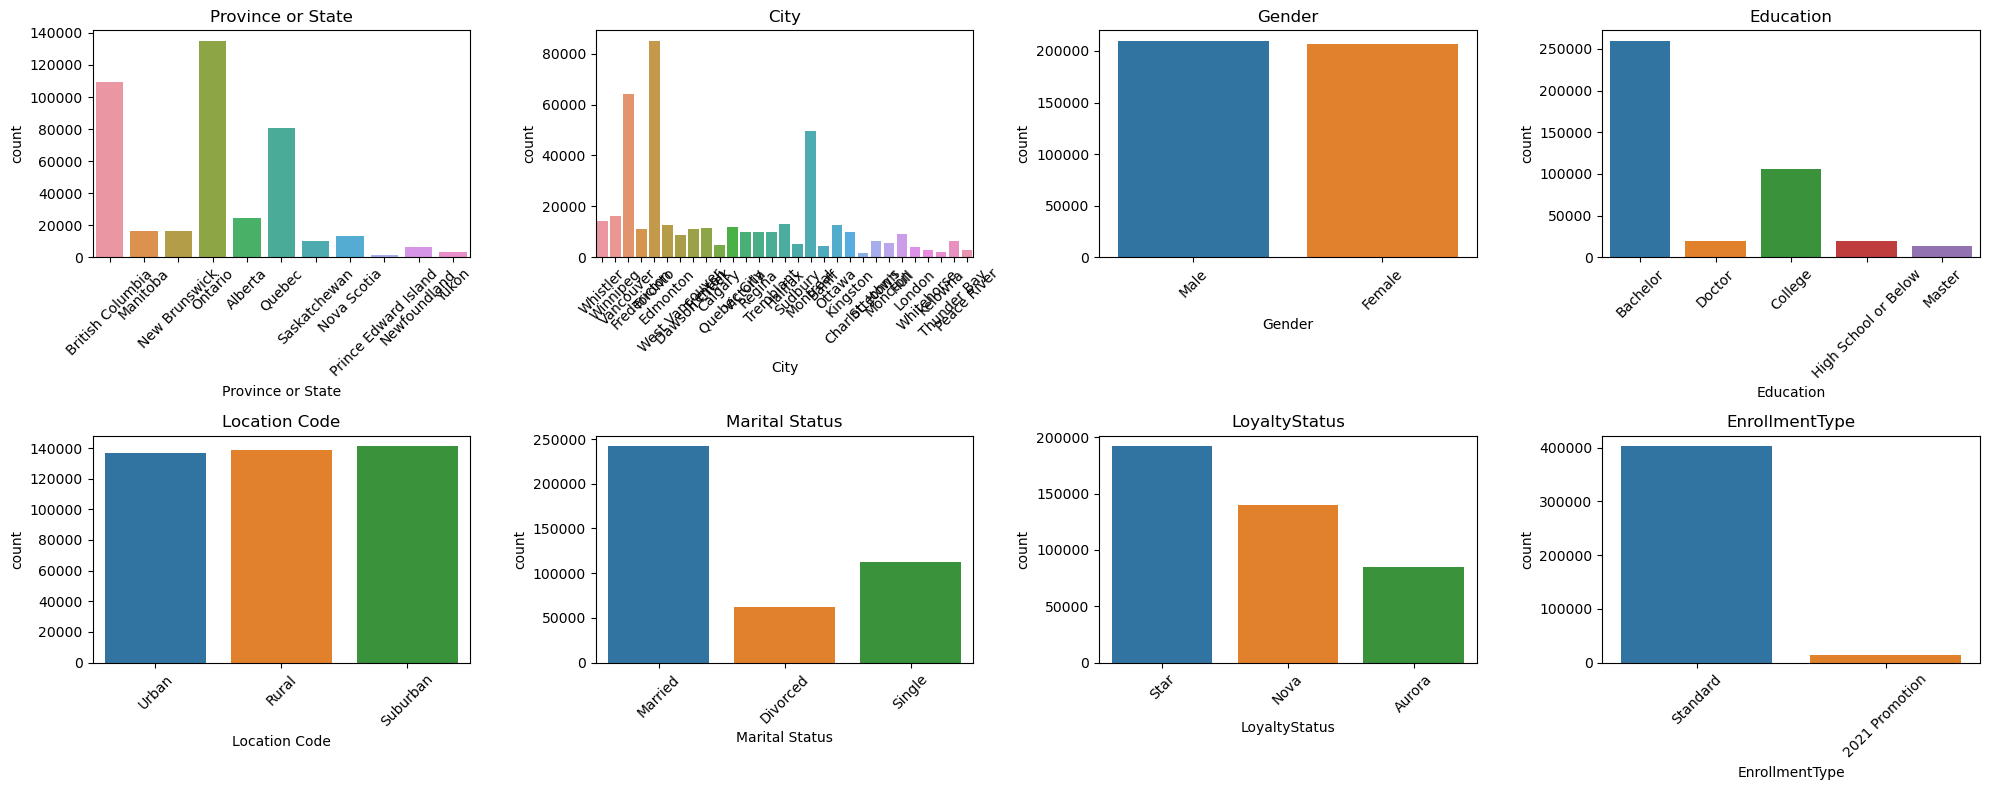

In [172]:
exclude_cols = ['First Name', 'Customer Name', 'Postal code', 'Last Name']

categorical_cols_filtered = [col for col in categorical_cols if col not in exclude_cols]

# Number of columns per row
cols_per_row = 4

# Calculate number of rows needed
num_rows = math.ceil(len(categorical_cols_filtered) / cols_per_row)

# Set up the figure
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 4*num_rows))
axes = axes.flatten()  # flatten in case we have less plots than grid

for i, col in enumerate(categorical_cols_filtered):
    sns.countplot(data=DB_clean, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Turn off any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Enrollment Type

In [173]:
# Proporção de cada tipo de Enrollment
enrollment_prop = DB_clean['EnrollmentType'].value_counts(normalize=True).round(4) * 100

# Mostrar como tabela ordenada
print(enrollment_prop.reset_index().rename(columns={'index': 'EnrollmentType', 'EnrollmentType': 'Percentage (%)'}))


   Percentage (%)  proportion
0        Standard       96.54
1  2021 Promotion        3.46


In [174]:
DB_clean.columns

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed', 'First Name', 'Last Name',
       'Customer Name', 'Province or State', 'City', 'Latitude', 'Longitude',
       'Postal code', 'Gender', 'Education', 'Location Code', 'Income',
       'Marital Status', 'LoyaltyStatus', 'EnrollmentDateOpening',
       'CancellationDate', 'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')

## Numerical Features

C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

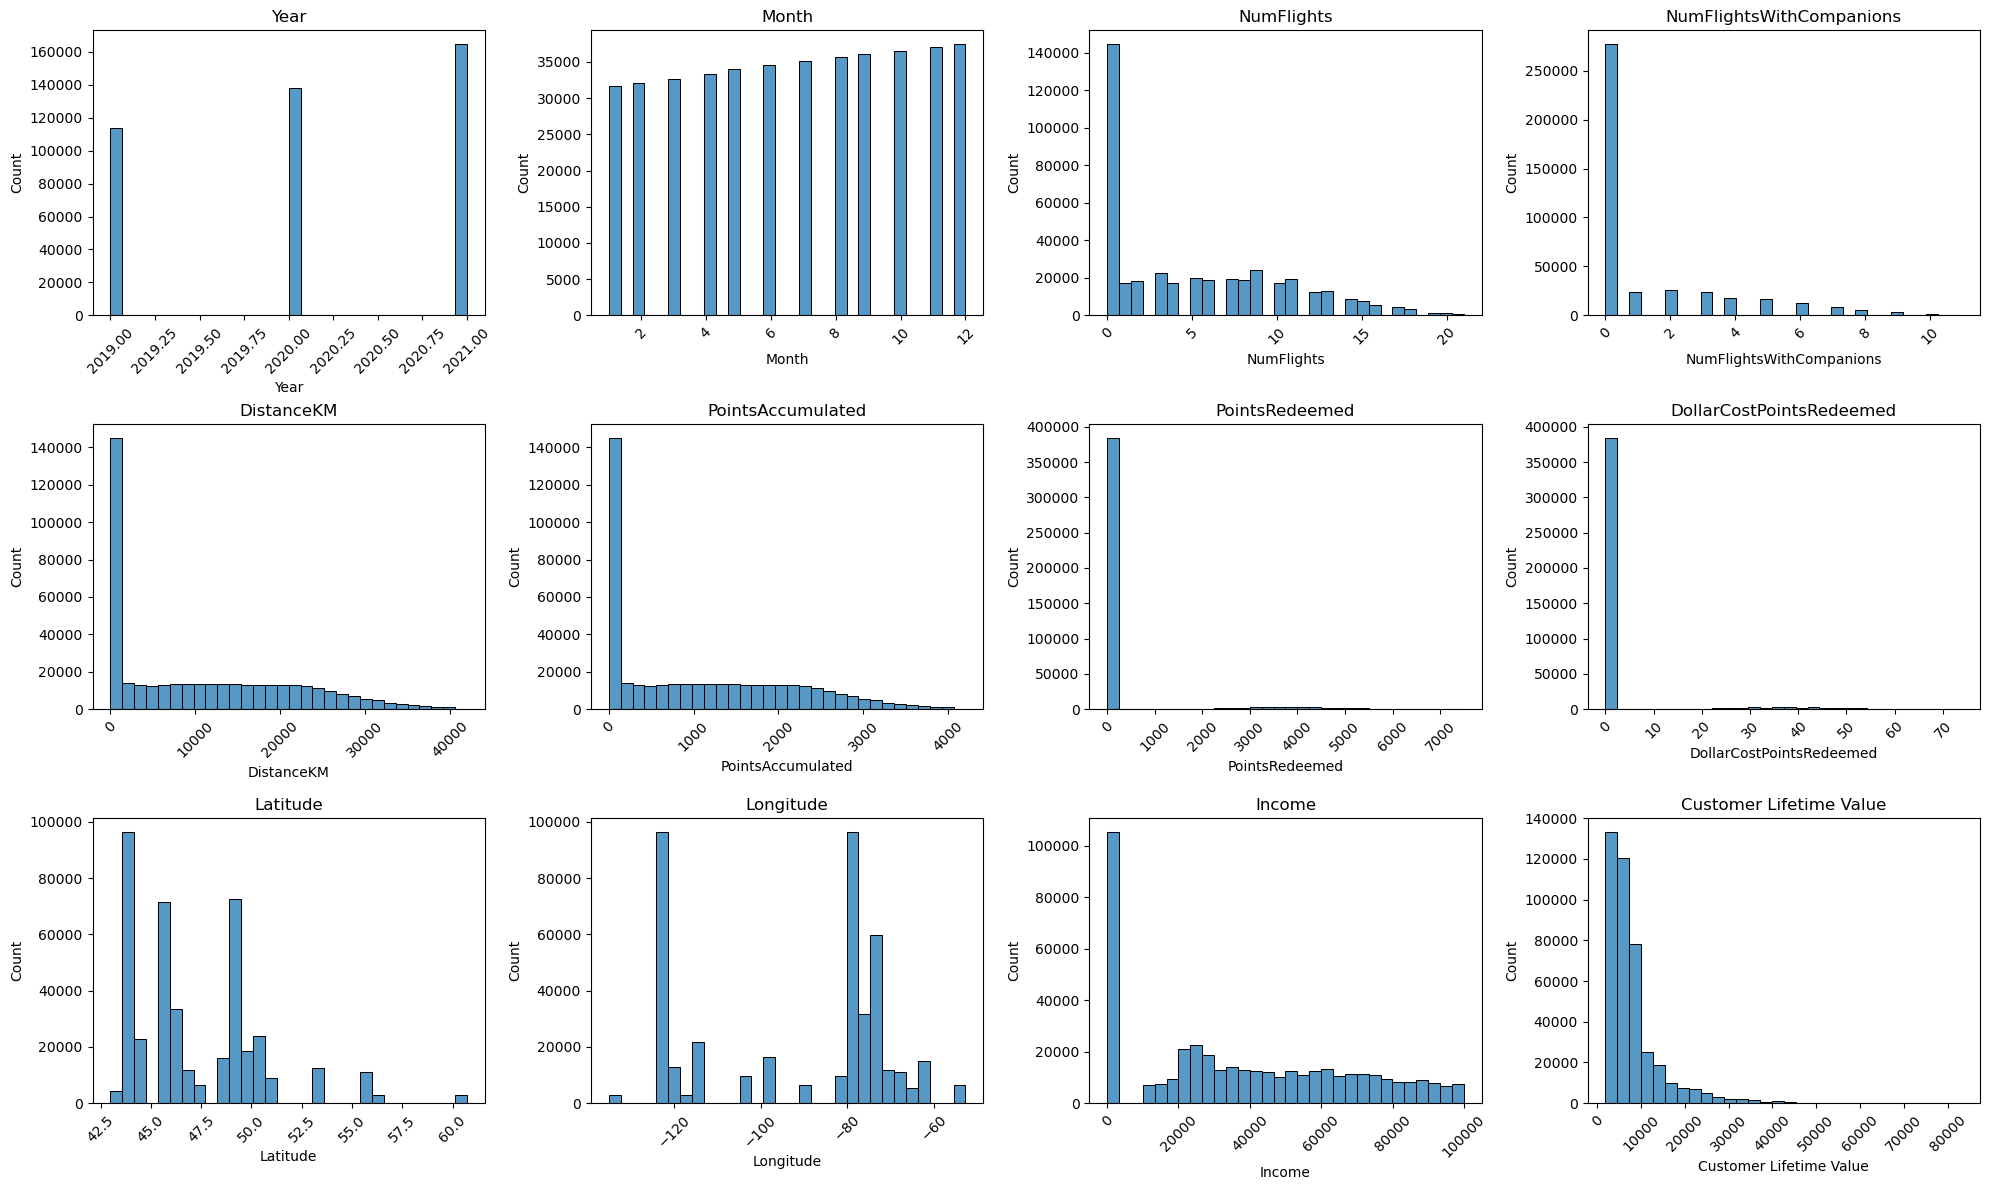

In [175]:
exclude_numeric_cols = ['Loyalty#']

# Filtra colunas numéricas
numeric_cols_filtered = [col for col in numeric_cols if col not in exclude_numeric_cols]

# Número de colunas por linha
cols_per_row = 4

# Calcula número de linhas necessárias
num_rows = math.ceil(len(numeric_cols_filtered) / cols_per_row)

# Configura a figura
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 4*num_rows))
axes = axes.flatten()

# Plota histogramas
for i, col in enumerate(numeric_cols_filtered):
    sns.histplot(DB_clean[col], kde=False, ax=axes[i], bins=30)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Desliga subplots não usados
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


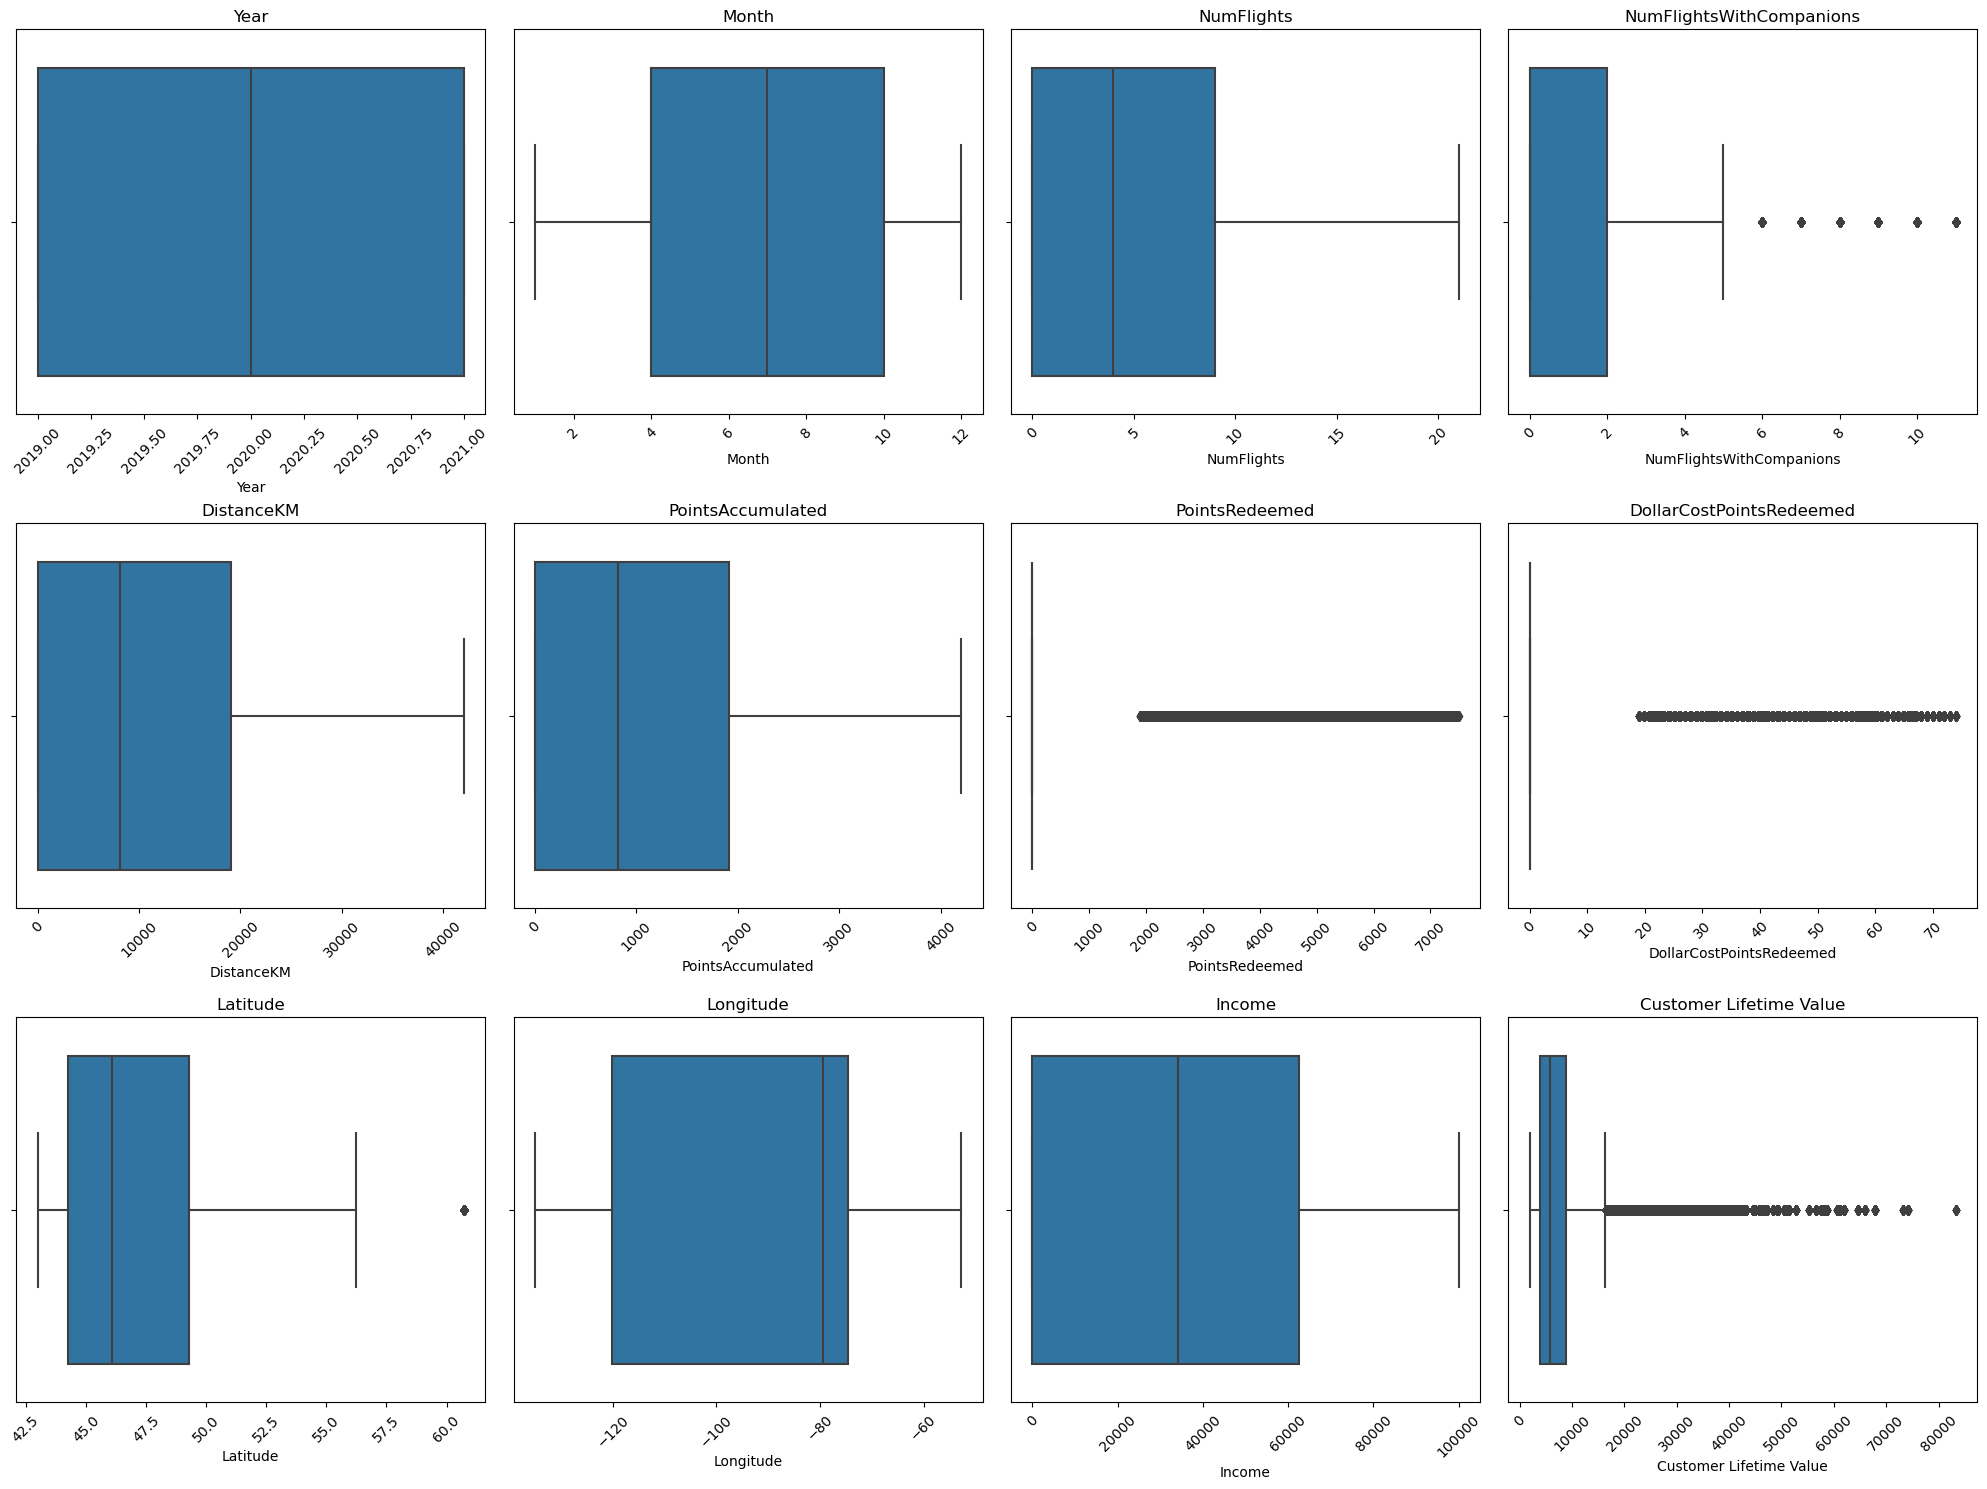

In [176]:
# Número de colunas por linha
cols_per_row = 4

# Calcula número de linhas necessárias
num_rows = math.ceil(len(numeric_cols_filtered) / cols_per_row)

# Configura a figura
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 5*num_rows))
axes = axes.flatten()

# Plota boxplots
for i, col in enumerate(numeric_cols_filtered):
    sns.boxplot(data=DB_clean, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Desliga subplots não usados
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


C:\Users\calco\anaconda4\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


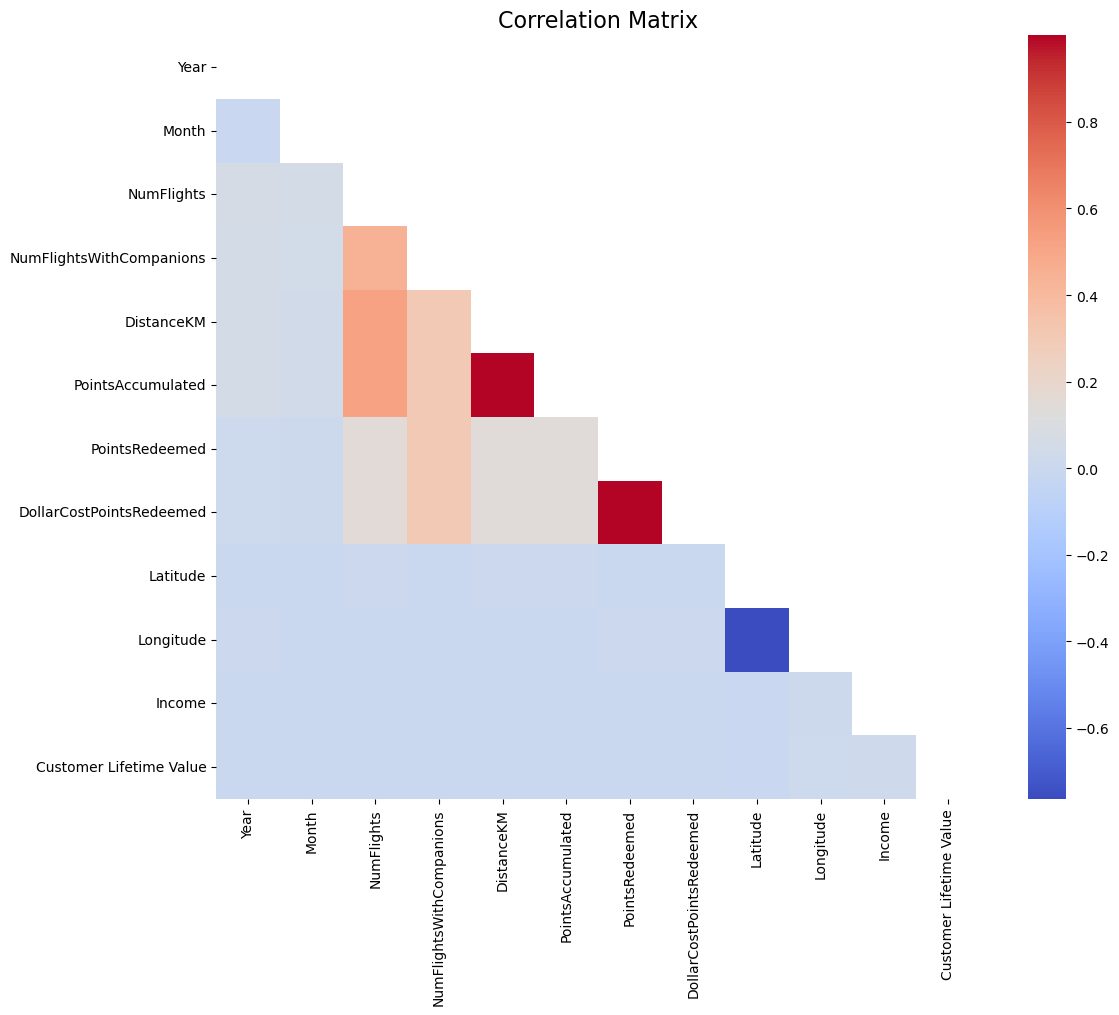

In [177]:
# Calcula a matriz de correlação
corr_matrix = DB_clean[numeric_cols_filtered].corr()

# Criar máscara para o triângulo superior (ou inferior)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # triângulo superior
# mask = np.tril(np.ones_like(corr_matrix, dtype=bool)) # triângulo inferior, se preferires

# Configura figura
plt.figure(figsize=(12, 10))

# Plota heatmap com máscara
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


In [178]:
corr_matrix.head(12)

,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,Latitude,Longitude,Income,Customer Lifetime Value
Year,1.000000,-0.006491,0.063672,0.053487,0.052231,0.052244,0.015099,0.015072,0.000019,0.001053,-0.000026,0.000028
Month,-0.006491,1.000000,0.055662,0.045779,0.040170,0.040176,0.012018,0.012122,0.000542,-0.000781,0.000737,0.000021
NumFlights,0.063672,0.055662,1.000000,0.445078,0.519242,0.519177,0.146192,0.146178,0.002681,-0.002139,-0.002379,-0.001442
NumFlightsWithCompanions,0.053487,0.045779,0.445078,1.000000,0.307834,0.307798,0.304559,0.304452,-0.000221,-0.001251,-0.000859,-0.002277
DistanceKM,0.052231,0.040170,0.519242,0.307834,1.000000,1.000000,0.143843,0.143804,0.002011,-0.003128,0.000533,-0.003127
PointsAccumulated,0.052244,0.040176,0.519177,0.307798,1.000000,1.000000,0.143824,0.143785,0.002010,-0.003127,0.000533,-0.003127
PointsRedeemed,0.015099,0.012018,0.146192,0.304559,0.143843,0.143824,1.000000,0.999970,-0.002957,0.002254,-0.002309,-0.000006
DollarCostPointsRedeemed,0.015072,0.012122,0.146178,0.304452,0.143804,0.143785,0.999970,1.000000,-0.002946,0.002247,-0.002306,-0.000033
Latitude,0.000019,0.000542,0.002681,-0.000221,0.002011,0.002010,-0.002957,-0.002946,1.000000,-0.763944,-0.011939,-0.010908
Longitude,0.001053,-0.000781,-0.002139,-0.001251,-0.003128,-0.003127,0.002254,0.002247,-0.763944,1.000000,0.009279,0.017469


## Distance KM vs Points Accumulated

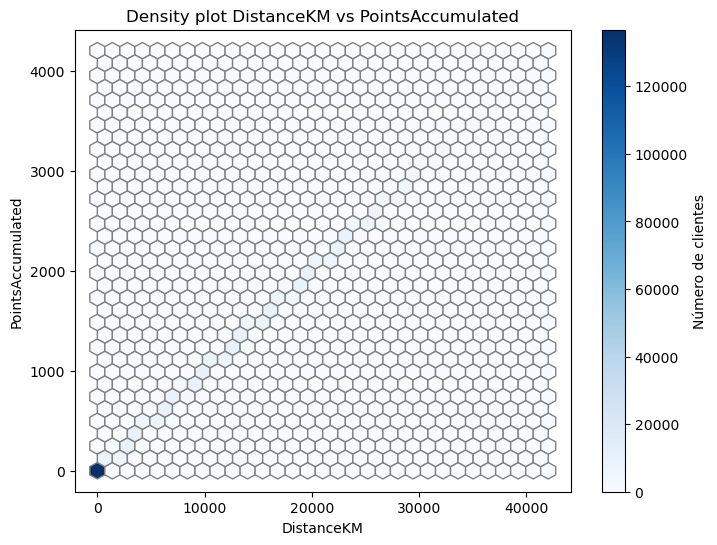

In [179]:
plt.figure(figsize=(8,6))
plt.hexbin(
    DB_clean['DistanceKM'], 
    DB_clean['PointsAccumulated'], 
    gridsize=30, 
    cmap='Blues',
    edgecolors='grey'  # contorno para cada hexágono
)
plt.colorbar(label='Número de clientes')
plt.xlabel('DistanceKM')
plt.ylabel('PointsAccumulated')
plt.title('Density plot DistanceKM vs PointsAccumulated')
plt.show()


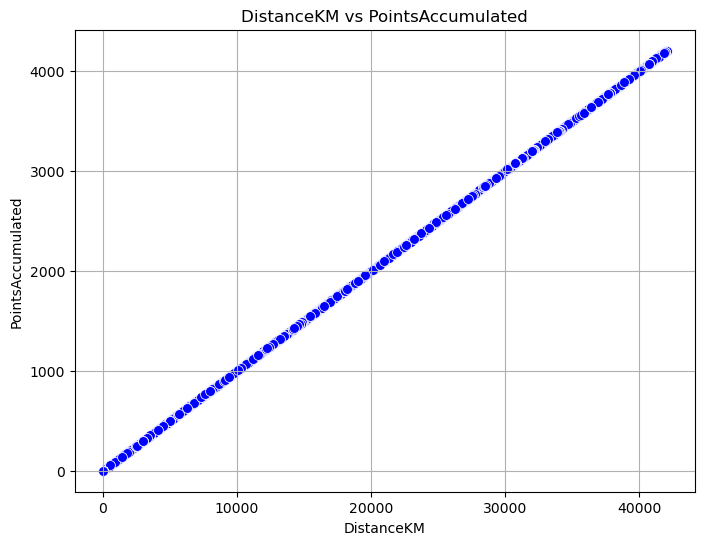

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=DB_clean['DistanceKM'], 
    y=DB_clean['PointsAccumulated'],
    color='blue',   # cor sólida
    s=50,           # tamanho do ponto
    alpha=1.0       # opacidade total
)
plt.xlabel('DistanceKM')
plt.ylabel('PointsAccumulated')
plt.title('DistanceKM vs PointsAccumulated')
plt.grid(True)
plt.show()


In [181]:
## vamos ter que retirar uma destas variaveis, pois a sua correlação é 1

## NumFlights Vs Points Accumulated

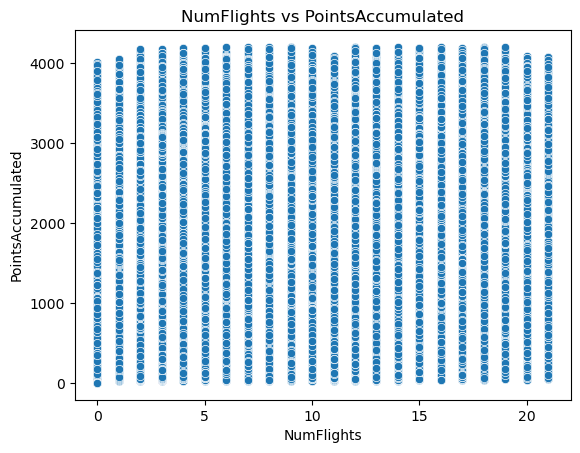

In [182]:
# Scatter plot
sns.scatterplot(data=DB_clean, x='NumFlights', y='PointsAccumulated')
plt.title('NumFlights vs PointsAccumulated')
plt.show()

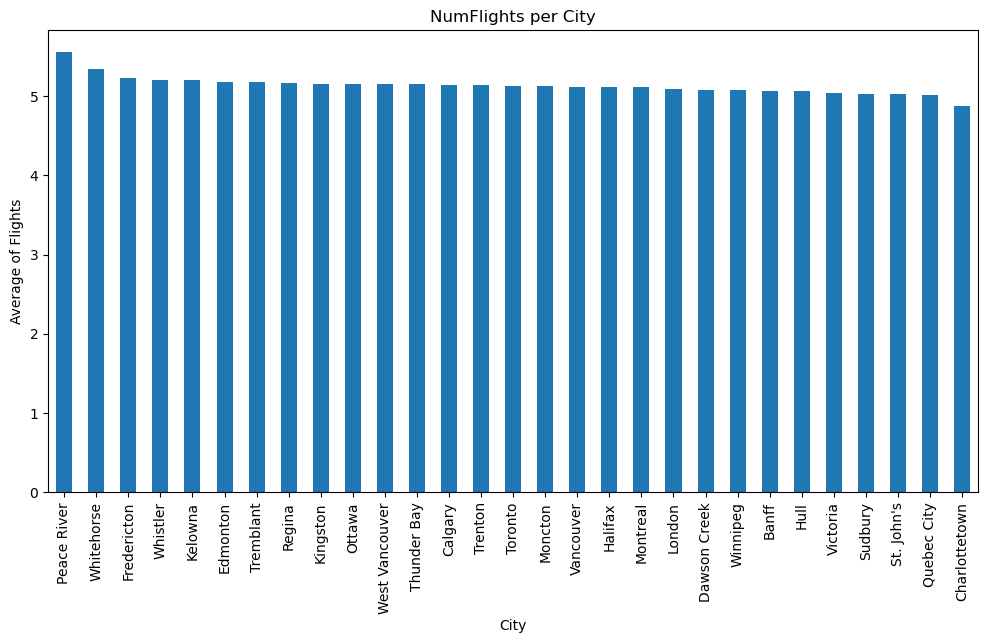

In [183]:
city_flights = DB_clean.groupby('City')['NumFlights'].mean().sort_values(ascending=False)
city_flights.plot(kind='bar', figsize=(12,6))
plt.title('NumFlights per City')
plt.ylabel('Average of Flights')
plt.show()


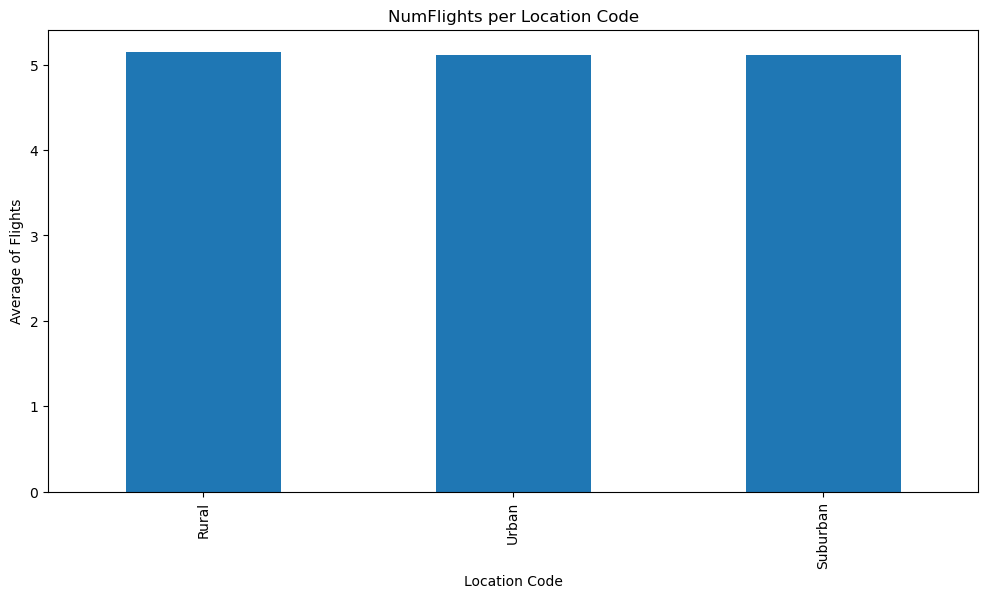

In [184]:
location_flights = DB_clean.groupby('Location Code')['NumFlights'].mean().sort_values(ascending=False)
location_flights.plot(kind='bar', figsize=(12,6))
plt.title('NumFlights per Location Code')
plt.ylabel('Average of Flights')
plt.show()

## 3 Build New Features

In [185]:
new_features_list = []

## Redemption Rate

In [186]:
DB_clean['Redemption Rate'] = DB_clean['PointsRedeemed'] / DB_clean['PointsAccumulated']

DB_clean['Redemption Rate'].replace([np.inf, -np.inf], np.nan, inplace=True)

new_features_list.append('Redemption Rate')

## Renroll

In [187]:
DB_clean['Renroll'] = np.where(DB_clean['CancellationDate'] < DB_clean['EnrollmentDateOpening'], 1, 0)
new_features_list.append('Renroll')

## Has canceled

In [188]:
def compute_final_canceled(group):
    # Sort by EnrollmentDateOpening
    group = group.sort_values('EnrollmentDateOpening')
    
    # Check if there is any active period after a cancellation
    # Iterate over the records from first to last
    canceled = 1  # assume canceled initially
    for i, row in group.iterrows():
        if pd.isna(row['CancellationDate']):
            canceled = 0  # still active
            break
        # check if there is a subsequent period with EnrollmentDate > CancellationDate
        later_periods = group[group['EnrollmentDateOpening'] > row['CancellationDate']]
        if not later_periods.empty:
            canceled = 0
            break
    return pd.Series({'Has Canceled': canceled})



In [189]:
new_features_list.append('Has Canceled')
new_features_list

['Redemption Rate', 'Renroll', 'Has Canceled']

## Active Days

In [190]:
import pandas as pd
import numpy as np

today = pd.Timestamp('today')

# Make sure Renroll exists per customer
# 1 = customer re-enrolled at least once, 0 = no re-enrollment
# Example: DB['Renroll'] already calculated per customer

# Merge Renroll flag to DB if needed
# DB = DB.merge(DB_reenroll, on='Loyalty#', how='left')

# Function to compute ActiveDays considering re-enrollment
def compute_active_days(row):
    if row['Renroll'] == 1:
        # Sum days before cancellation + days after re-enrollment
        days_before_cancel = 0
        if pd.notna(row['CancellationDate']):
            days_before_cancel = (row['CancellationDate'] - row['EnrollmentDateOpening']).days
        days_after_enroll = (today - row['EnrollmentDateOpening']).days
        return max(days_before_cancel, 0) + max(days_after_enroll, 0)
    else:
        # Normal calculation
        if pd.notna(row['CancellationDate']):
            return max((row['CancellationDate'] - row['EnrollmentDateOpening']).days, 0)
        else:
            return max((today - row['EnrollmentDateOpening']).days, 0)

# Convert to years if needed
DB_clean['ActiveYears'] = DB_clean['ActiveDays'] / 365

# Add to feature list if not already
if 'ActiveDays' not in new_features_list:
    new_features_list.append('ActiveDays')

KeyError: 'ActiveDays'

## Net Points

In [ ]:
DB_clean['Net Points'] = DB_clean['PointsAccumulated']-DB_clean['PointsRedeemed']
new_features_list.append('Net Points')

Before going to preprocessing, let's drop some columns we will not need

In [ ]:
#drop columns that are not necessary